In [ ]:
# 설치가 안되어있다면 pip insatll로 하나씩 설치해보시길 바람
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import yaml
import ultralytics
from ultralytics import YOLO
ultralytics.checks()


Ultralytics YOLOv8.2.103  Python-3.8.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Setup complete  (16 CPUs, 15.6 GB RAM, 393.2/476.0 GB disk)


In [ ]:
import os
import shutil
import glob

# 원본 데이터 루트
base_image_dir = r"C:\Users\dounghun\Desktop\gochu_yolo\yolo_images"  # 이미지 폴더(경로확인!)
base_label_dir = r"C:\Users\dounghun\Desktop\gochu_yolo\yolo_labels"  # 라벨 폴더(경로확인!)

# 저장할 경로(경로확인!!)
output_root = r"C:\Users\dounghun\Desktop\gochu_yolo"
train_root = os.path.join(output_root, "train")
valid_root = os.path.join(output_root, "valid")
test_root = os.path.join(output_root, "test")

# 데이터셋 폴더 생성
for folder in [train_root, valid_root, test_root]:
    os.makedirs(os.path.join(folder, "images"), exist_ok=True)
    os.makedirs(os.path.join(folder, "labels"), exist_ok=True)

# 모든 이미지 파일 가져오기 (하위 폴더까지 포함)
image_files = glob.glob(os.path.join(base_image_dir, "**", "*.[jJ][pP][gG]"), recursive=True)

# 모든 라벨 파일 가져오기 (하위 폴더까지 포함)
label_files = glob.glob(os.path.join(base_label_dir, "**", "*.txt"), recursive=True)

# 무작위로 섞기
random.shuffle(image_files)

# 데이터셋 나누기 (80%, 10%, 10%)
num_files = len(image_files)
test_count = int(num_files * 0.1)
valid_count = int(num_files * 0.1)
train_count = num_files - test_count - valid_count

test_list = image_files[:test_count]
valid_list = image_files[test_count:test_count + valid_count]
train_list = image_files[test_count + valid_count:]

# 데이터 이동 함수 (이미지 먼저 이동)
def move_images(image_list, target_root):
    for image_path in image_list:
        image_name = os.path.basename(image_path)  # 이미지 파일명 추출
        dest_path = os.path.join(target_root, "images", image_name)
        shutil.copyfile(image_path, dest_path)
        print(f"✅ 이미지 이동: {image_path} → {dest_path}")

# 각 데이터셋에 이미지 이동
move_images(train_list, train_root)
move_images(valid_list, valid_root)
move_images(test_list, test_root)

print("✅ 모든 이미지 이동 완료!")

# 라벨 이동 함수
def move_labels(target_root):
    label_dest_dir = os.path.join(target_root, "labels")
    image_dest_dir = os.path.join(target_root, "images")

    for label_path in label_files:
        label_name = os.path.basename(label_path)
        label_folder = os.path.basename(os.path.dirname(label_path))  # good, wlfqud, wmdrkd 등
        
        # 이미지 파일명과 동일한 이름을 찾아야 하므로 확장자만 .txt에서 .jpg로 변환
        image_name = label_name.replace(".txt", ".jpg")
        
        # 해당 이미지 파일이 있는지 확인
        matching_image = None
        for ext in [".jpg", ".JPG", ".jpeg", ".JPEG"]:
            image_path = os.path.join(image_dest_dir, image_name.replace(".jpg", ext))
            if os.path.exists(image_path):  # 이미지가 존재하면
                matching_image = image_path
                break
        
        if matching_image:
            shutil.copyfile(label_path, os.path.join(label_dest_dir, label_name))
            print(f"✅ 라벨 이동: {label_path} → {os.path.join(label_dest_dir, label_name)}")
        else:
            print(f"⚠ 이미지 없음 → 라벨 이동 안 함: {label_name}")

# 각 데이터셋에 대해 라벨 이동
move_labels(train_root)
move_labels(valid_root)
move_labels(test_root)

print("✅ 모든 라벨 이동 완료!")


✅ 이미지 이동: C:\Users\dounghun\Desktop\gochu_yolo\yolo_images\wlfqud\V006_79_1_01_01_01_13_3_1553bb_20201125_4.JPG → C:\Users\dounghun\Desktop\gochu_yolo\train\images\V006_79_1_01_01_01_13_3_1553bb_20201125_4.JPG
✅ 이미지 이동: C:\Users\dounghun\Desktop\gochu_yolo\yolo_images\wmdrkd\V006_79_1_02_01_03_13_1_1553bb_20201008_1_a0003.jpg → C:\Users\dounghun\Desktop\gochu_yolo\train\images\V006_79_1_02_01_03_13_1_1553bb_20201008_1_a0003.jpg
✅ 이미지 이동: C:\Users\dounghun\Desktop\gochu_yolo\yolo_images\wmdrkd\V006_79_1_01_01_01_13_2_0868z_20201019_20_a0003.JPG → C:\Users\dounghun\Desktop\gochu_yolo\train\images\V006_79_1_01_01_01_13_2_0868z_20201019_20_a0003.JPG
✅ 이미지 이동: C:\Users\dounghun\Desktop\gochu_yolo\yolo_images\wmdrkd\V006_79_1_01_01_01_13_3_0149z_20201014_16_a0003.JPG → C:\Users\dounghun\Desktop\gochu_yolo\train\images\V006_79_1_01_01_01_13_3_0149z_20201014_16_a0003.JPG
✅ 이미지 이동: C:\Users\dounghun\Desktop\gochu_yolo\yolo_images\wmdrkd\V006_79_1_02_01_03_13_3_9315z_20201023_39_a0000.JPG → C:\U

In [22]:
from ultralytics import YOLO

# YOLO 모델 로드 (사전 학습된 모델 사용)
model = YOLO("yolov8n.pt")  # 필요한 경우 'yolov8s.pt', 'yolov8m.pt' 등으로 변경 가능

# 학습 시작 (data.yaml 사용)
model.train(
    data=r"C:\Users\dounghun\Desktop\gochu_yolo\data.yaml",  # data.yaml의 경로
    epochs=100,  # 학습할 epoch 수
    imgsz=640,  # 이미지 크기
    batch=16,   # 배치 크기
    device="cuda"  # GPU 사용 (없으면 "cpu"로 설정)
)

New https://pypi.org/project/ultralytics/8.3.75 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103  Python-3.8.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\dounghun\Desktop\gochu_yolo\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning C:\Users\dounghun\Desktop\gochu_yolo\train\labels... 2863 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2863/2863 [00:08<00:00, 353.08it/s]


train: New cache created: C:\Users\dounghun\Desktop\gochu_yolo\train\labels.cache


val: Scanning C:\Users\dounghun\Desktop\gochu_yolo\valid\labels... 357 images, 0 backgrounds, 0 corrupt: 100%|██████████| 357/357 [00:01<00:00, 282.45it/s]

val: New cache created: C:\Users\dounghun\Desktop\gochu_yolo\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.16G      1.143      2.061      1.388         37        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]

                   all        357        357      0.583      0.586      0.578      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.12G      1.229      1.576      1.396         37        640: 100%|██████████| 179/179 [01:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.39it/s]

                   all        357        357      0.647      0.572      0.635      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.1G      1.256      1.371       1.41         41        640: 100%|██████████| 179/179 [01:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.65it/s]

                   all        357        357       0.78       0.58      0.687      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.11G      1.221      1.253      1.381         36        640: 100%|██████████| 179/179 [01:25<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.61it/s]

                   all        357        357      0.712      0.633       0.69      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.1G      1.176      1.164      1.343         36        640: 100%|██████████| 179/179 [01:23<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]

                   all        357        357      0.752      0.741       0.78      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.1G      1.121      1.041      1.308         41        640: 100%|██████████| 179/179 [01:23<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        357        357      0.727      0.726      0.761      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.1G      1.093     0.9848       1.29         30        640: 100%|██████████| 179/179 [01:25<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        357        357      0.842       0.71        0.8      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.11G      1.058     0.9553      1.272         33        640: 100%|██████████| 179/179 [01:29<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]

                   all        357        357      0.702      0.601      0.703      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.1G      1.052     0.9261      1.265         36        640: 100%|██████████| 179/179 [01:40<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]

                   all        357        357      0.762      0.744      0.819      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.1G       1.03     0.8712      1.243         34        640: 100%|██████████| 179/179 [01:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        357        357      0.868      0.759       0.83      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.1G      1.004      0.861      1.223         33        640: 100%|██████████| 179/179 [01:24<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        357        357      0.767      0.826       0.83      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.11G     0.9976     0.8475      1.218         35        640: 100%|██████████| 179/179 [01:43<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]


                   all        357        357      0.807      0.731      0.818      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.1G     0.9504     0.8054      1.197         40        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        357        357      0.836      0.776       0.85      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.1G      0.943     0.7999      1.198         36        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]

                   all        357        357      0.864      0.814       0.88      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.1G     0.9202     0.7634      1.179         40        640: 100%|██████████| 179/179 [01:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        357        357      0.842      0.732      0.829      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.11G      0.919     0.7659      1.174         32        640: 100%|██████████| 179/179 [01:25<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]

                   all        357        357      0.862      0.754       0.86      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.1G     0.9069     0.7404      1.162         44        640: 100%|██████████| 179/179 [01:24<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.10it/s]

                   all        357        357      0.862       0.81      0.858      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.1G     0.8961     0.7385      1.162         28        640: 100%|██████████| 179/179 [01:24<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]

                   all        357        357      0.868      0.816      0.873      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.1G     0.8694     0.7013      1.146         36        640: 100%|██████████| 179/179 [01:24<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]

                   all        357        357      0.841      0.798      0.874      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.11G     0.8598     0.6942      1.141         40        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        357        357      0.869      0.856      0.904      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.1G     0.8582     0.6868      1.138         36        640: 100%|██████████| 179/179 [01:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]

                   all        357        357      0.895      0.824      0.889      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.1G     0.8451     0.6942      1.134         31        640: 100%|██████████| 179/179 [01:31<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]

                   all        357        357      0.882       0.81       0.89      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.1G     0.8408     0.6809      1.133         36        640: 100%|██████████| 179/179 [01:31<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]

                   all        357        357      0.949      0.833      0.915      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.11G     0.8229     0.6681      1.121         29        640: 100%|██████████| 179/179 [01:29<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]

                   all        357        357      0.884      0.838      0.882      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.1G     0.8213     0.6699      1.119         32        640: 100%|██████████| 179/179 [01:32<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]

                   all        357        357      0.878      0.828      0.887      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.1G     0.8069     0.6477       1.11         37        640: 100%|██████████| 179/179 [01:30<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        357        357      0.913      0.848      0.914      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.1G        0.8     0.6324      1.102         28        640: 100%|██████████| 179/179 [01:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        357        357      0.923      0.858      0.924       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.11G      0.791     0.6423      1.104         35        640: 100%|██████████| 179/179 [01:22<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.88it/s]

                   all        357        357       0.87       0.84      0.895      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.1G     0.7841     0.6321      1.098         27        640: 100%|██████████| 179/179 [01:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]

                   all        357        357      0.893      0.842      0.884      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.1G     0.7829     0.6219      1.096         35        640: 100%|██████████| 179/179 [01:20<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]

                   all        357        357      0.923      0.842      0.898      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.1G     0.7697     0.6011      1.089         36        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]

                   all        357        357      0.914      0.804      0.884      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.11G     0.7564     0.6015      1.078         32        640: 100%|██████████| 179/179 [01:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        357        357       0.89      0.873      0.924       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.1G     0.7596     0.5969      1.083         30        640: 100%|██████████| 179/179 [01:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]

                   all        357        357      0.856      0.869        0.9      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.1G     0.7465     0.5849      1.072         37        640: 100%|██████████| 179/179 [01:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        357        357      0.898      0.877      0.918      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.1G     0.7317     0.5857      1.068         35        640: 100%|██████████| 179/179 [01:21<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.71it/s]

                   all        357        357      0.883      0.912       0.93      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.11G       0.73     0.5743      1.064         38        640: 100%|██████████| 179/179 [01:23<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]

                   all        357        357      0.911      0.835      0.894      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.1G     0.7254     0.5688      1.066         31        640: 100%|██████████| 179/179 [01:20<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]

                   all        357        357      0.915      0.853       0.91      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.1G      0.726     0.5767      1.066         34        640: 100%|██████████| 179/179 [01:26<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        357        357      0.916       0.85      0.913      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.1G     0.7144     0.5673      1.053         33        640: 100%|██████████| 179/179 [01:38<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]

                   all        357        357      0.937       0.88      0.932      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.11G     0.7059     0.5514       1.05         30        640: 100%|██████████| 179/179 [01:26<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]

                   all        357        357      0.943      0.842      0.923       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.1G     0.6991     0.5541      1.047         46        640: 100%|██████████| 179/179 [01:20<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        357        357      0.932      0.863      0.929      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.1G     0.7051     0.5416      1.051         44        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]

                   all        357        357      0.948      0.864      0.933      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.1G     0.6882     0.5413      1.045         35        640: 100%|██████████| 179/179 [01:22<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]

                   all        357        357      0.917      0.856      0.919      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.11G     0.6815     0.5378      1.037         36        640: 100%|██████████| 179/179 [01:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]

                   all        357        357      0.945      0.827      0.919      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.1G     0.6701     0.5255      1.038         40        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]

                   all        357        357      0.892      0.888      0.927      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.1G     0.6716     0.5261      1.037         25        640: 100%|██████████| 179/179 [01:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        357        357      0.966      0.839      0.925      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.1G     0.6735      0.522      1.035         32        640: 100%|██████████| 179/179 [01:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]

                   all        357        357       0.96      0.839      0.927      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.11G     0.6597     0.5073      1.029         37        640: 100%|██████████| 179/179 [01:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]

                   all        357        357      0.966      0.871      0.934      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.1G     0.6577     0.5057      1.033         36        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]


                   all        357        357      0.956      0.887      0.945        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.1G     0.6721     0.5173      1.036         34        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.79it/s]

                   all        357        357       0.96      0.858      0.928      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.1G     0.6418     0.5118      1.026         29        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]

                   all        357        357      0.931      0.853      0.915      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.11G     0.6447     0.4955      1.023         36        640: 100%|██████████| 179/179 [01:23<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.02it/s]

                   all        357        357      0.919      0.884      0.936      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.1G     0.6364     0.5003       1.02         38        640: 100%|██████████| 179/179 [01:19<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]

                   all        357        357      0.921      0.895      0.932      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.1G     0.6263     0.4912      1.008         37        640: 100%|██████████| 179/179 [01:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        357        357      0.898      0.872      0.924      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.1G     0.6392     0.4914      1.022         37        640: 100%|██████████| 179/179 [01:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.13it/s]

                   all        357        357      0.929      0.871      0.924      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.11G      0.632     0.4826      1.016         43        640: 100%|██████████| 179/179 [01:26<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]

                   all        357        357      0.958      0.842      0.926      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.1G     0.6322     0.4861      1.018         38        640: 100%|██████████| 179/179 [01:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.68it/s]

                   all        357        357      0.919      0.872      0.919      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.1G     0.6233      0.482      1.016         37        640: 100%|██████████| 179/179 [01:27<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]

                   all        357        357      0.903      0.901      0.936      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.1G      0.607     0.4679      1.002         34        640: 100%|██████████| 179/179 [01:24<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]

                   all        357        357      0.905      0.906      0.928      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.11G     0.5984     0.4496      1.003         39        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]

                   all        357        357      0.945      0.875      0.925      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.1G     0.6033      0.472      1.002         31        640: 100%|██████████| 179/179 [01:20<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        357        357      0.915      0.904      0.939      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.1G     0.5899     0.4556     0.9961         30        640: 100%|██████████| 179/179 [01:21<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        357        357      0.943      0.886       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.1G     0.5962     0.4664     0.9992         42        640: 100%|██████████| 179/179 [01:25<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]

                   all        357        357      0.944      0.879      0.928      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.11G     0.5894     0.4434     0.9937         28        640: 100%|██████████| 179/179 [01:27<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]

                   all        357        357      0.969       0.86      0.941       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.1G     0.5835     0.4472     0.9919         35        640: 100%|██████████| 179/179 [01:24<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.80it/s]

                   all        357        357      0.927      0.898      0.937      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.1G     0.5732     0.4453     0.9917         41        640: 100%|██████████| 179/179 [01:22<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.67it/s]

                   all        357        357      0.942      0.895      0.936      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.1G     0.5729     0.4369     0.9888         41        640: 100%|██████████| 179/179 [01:24<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]

                   all        357        357      0.927      0.901      0.938      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.11G     0.5639     0.4294     0.9827         35        640: 100%|██████████| 179/179 [01:21<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        357        357       0.94      0.882      0.932      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.1G     0.5656     0.4351     0.9871         43        640: 100%|██████████| 179/179 [01:21<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]

                   all        357        357       0.94      0.889       0.94      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.1G     0.5617     0.4278     0.9879         36        640: 100%|██████████| 179/179 [01:20<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        357        357      0.935      0.897      0.939      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.1G     0.5647     0.4252     0.9809         34        640: 100%|██████████| 179/179 [01:25<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        357        357      0.966       0.87      0.931      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.11G     0.5597     0.4216     0.9867         41        640: 100%|██████████| 179/179 [01:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.89it/s]

                   all        357        357      0.966      0.852      0.933      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.1G     0.5467     0.4167      0.979         37        640: 100%|██████████| 179/179 [01:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]

                   all        357        357      0.934      0.897      0.937      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.1G     0.5381     0.4079     0.9727         41        640: 100%|██████████| 179/179 [01:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.65it/s]

                   all        357        357      0.943       0.89      0.942      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.1G     0.5407     0.3978     0.9733         33        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.04it/s]

                   all        357        357      0.976      0.867      0.937      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.11G     0.5331     0.3979     0.9691         31        640: 100%|██████████| 179/179 [01:21<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.79it/s]

                   all        357        357      0.931      0.901      0.943      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.1G     0.5255     0.3979     0.9693         38        640: 100%|██████████| 179/179 [01:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        357        357      0.942      0.913      0.945      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.1G      0.528     0.3991     0.9705         36        640: 100%|██████████| 179/179 [01:19<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]

                   all        357        357      0.936      0.897      0.934      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.1G     0.5243     0.3973     0.9662         40        640: 100%|██████████| 179/179 [01:21<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]

                   all        357        357      0.965      0.893      0.943      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.11G      0.525     0.3925     0.9684         35        640: 100%|██████████| 179/179 [01:24<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]

                   all        357        357      0.889      0.914      0.931      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.1G     0.5227      0.392     0.9665         31        640: 100%|██████████| 179/179 [01:20<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        357        357      0.988      0.876      0.941      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.1G      0.522      0.398     0.9658         34        640: 100%|██████████| 179/179 [01:21<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]

                   all        357        357      0.941      0.902      0.946      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.1G     0.5075     0.3864     0.9609         33        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  3.00it/s]

                   all        357        357       0.93      0.911      0.941      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.11G     0.4962     0.3733     0.9565         34        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        357        357      0.928      0.911      0.943      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.1G     0.5072     0.3867     0.9584         30        640: 100%|██████████| 179/179 [01:22<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        357        357      0.944      0.902      0.939      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.1G     0.4947     0.3702     0.9572         37        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]

                   all        357        357      0.915      0.896      0.929      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.1G     0.4979     0.3703     0.9557         42        640: 100%|██████████| 179/179 [01:21<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]

                   all        357        357      0.948      0.895      0.932      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.11G     0.4987     0.3744     0.9613         33        640: 100%|██████████| 179/179 [01:25<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]

                   all        357        357      0.915      0.897      0.929      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.1G     0.4898     0.3661     0.9493         31        640: 100%|██████████| 179/179 [01:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        357        357      0.919      0.911       0.93      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.1G       0.48     0.3634     0.9535         35        640: 100%|██████████| 179/179 [01:23<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        357        357      0.925      0.895      0.934      0.839


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.1G     0.3404     0.2474     0.8585         15        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        357        357      0.955      0.856      0.927      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.11G     0.3293      0.228     0.8504         15        640: 100%|██████████| 179/179 [01:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        357        357      0.939      0.895      0.929      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.1G     0.3186     0.2237     0.8536         15        640: 100%|██████████| 179/179 [01:17<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.00it/s]

                   all        357        357      0.925      0.884      0.928      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.1G      0.311     0.2167     0.8479         15        640: 100%|██████████| 179/179 [01:25<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        357        357      0.938      0.915      0.935      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.1G     0.3058     0.2152     0.8501         15        640: 100%|██████████| 179/179 [01:19<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        357        357      0.942      0.893       0.93      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.11G     0.2983     0.2088     0.8447         15        640: 100%|██████████| 179/179 [01:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        357        357      0.953      0.901      0.929      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.1G     0.2963     0.2091     0.8435         15        640: 100%|██████████| 179/179 [01:19<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]

                   all        357        357      0.929      0.905      0.929      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.1G     0.2936     0.2039     0.8379         15        640: 100%|██████████| 179/179 [01:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]

                   all        357        357      0.937      0.909      0.932      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.1G     0.2932     0.2036     0.8377         15        640: 100%|██████████| 179/179 [01:22<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]

                   all        357        357      0.933      0.915      0.931      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.11G     0.2905     0.2023     0.8396         15        640: 100%|██████████| 179/179 [01:22<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]

                   all        357        357      0.929      0.911      0.929      0.839



100 epochs completed in 2.501 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.103  Python-3.8.19 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.15it/s]


                   all        357        357      0.929      0.911      0.943      0.843
                  good        112        112      0.861      0.821      0.892      0.719
                wlfqud        245        245      0.998          1      0.995      0.967
Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000259477E2340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

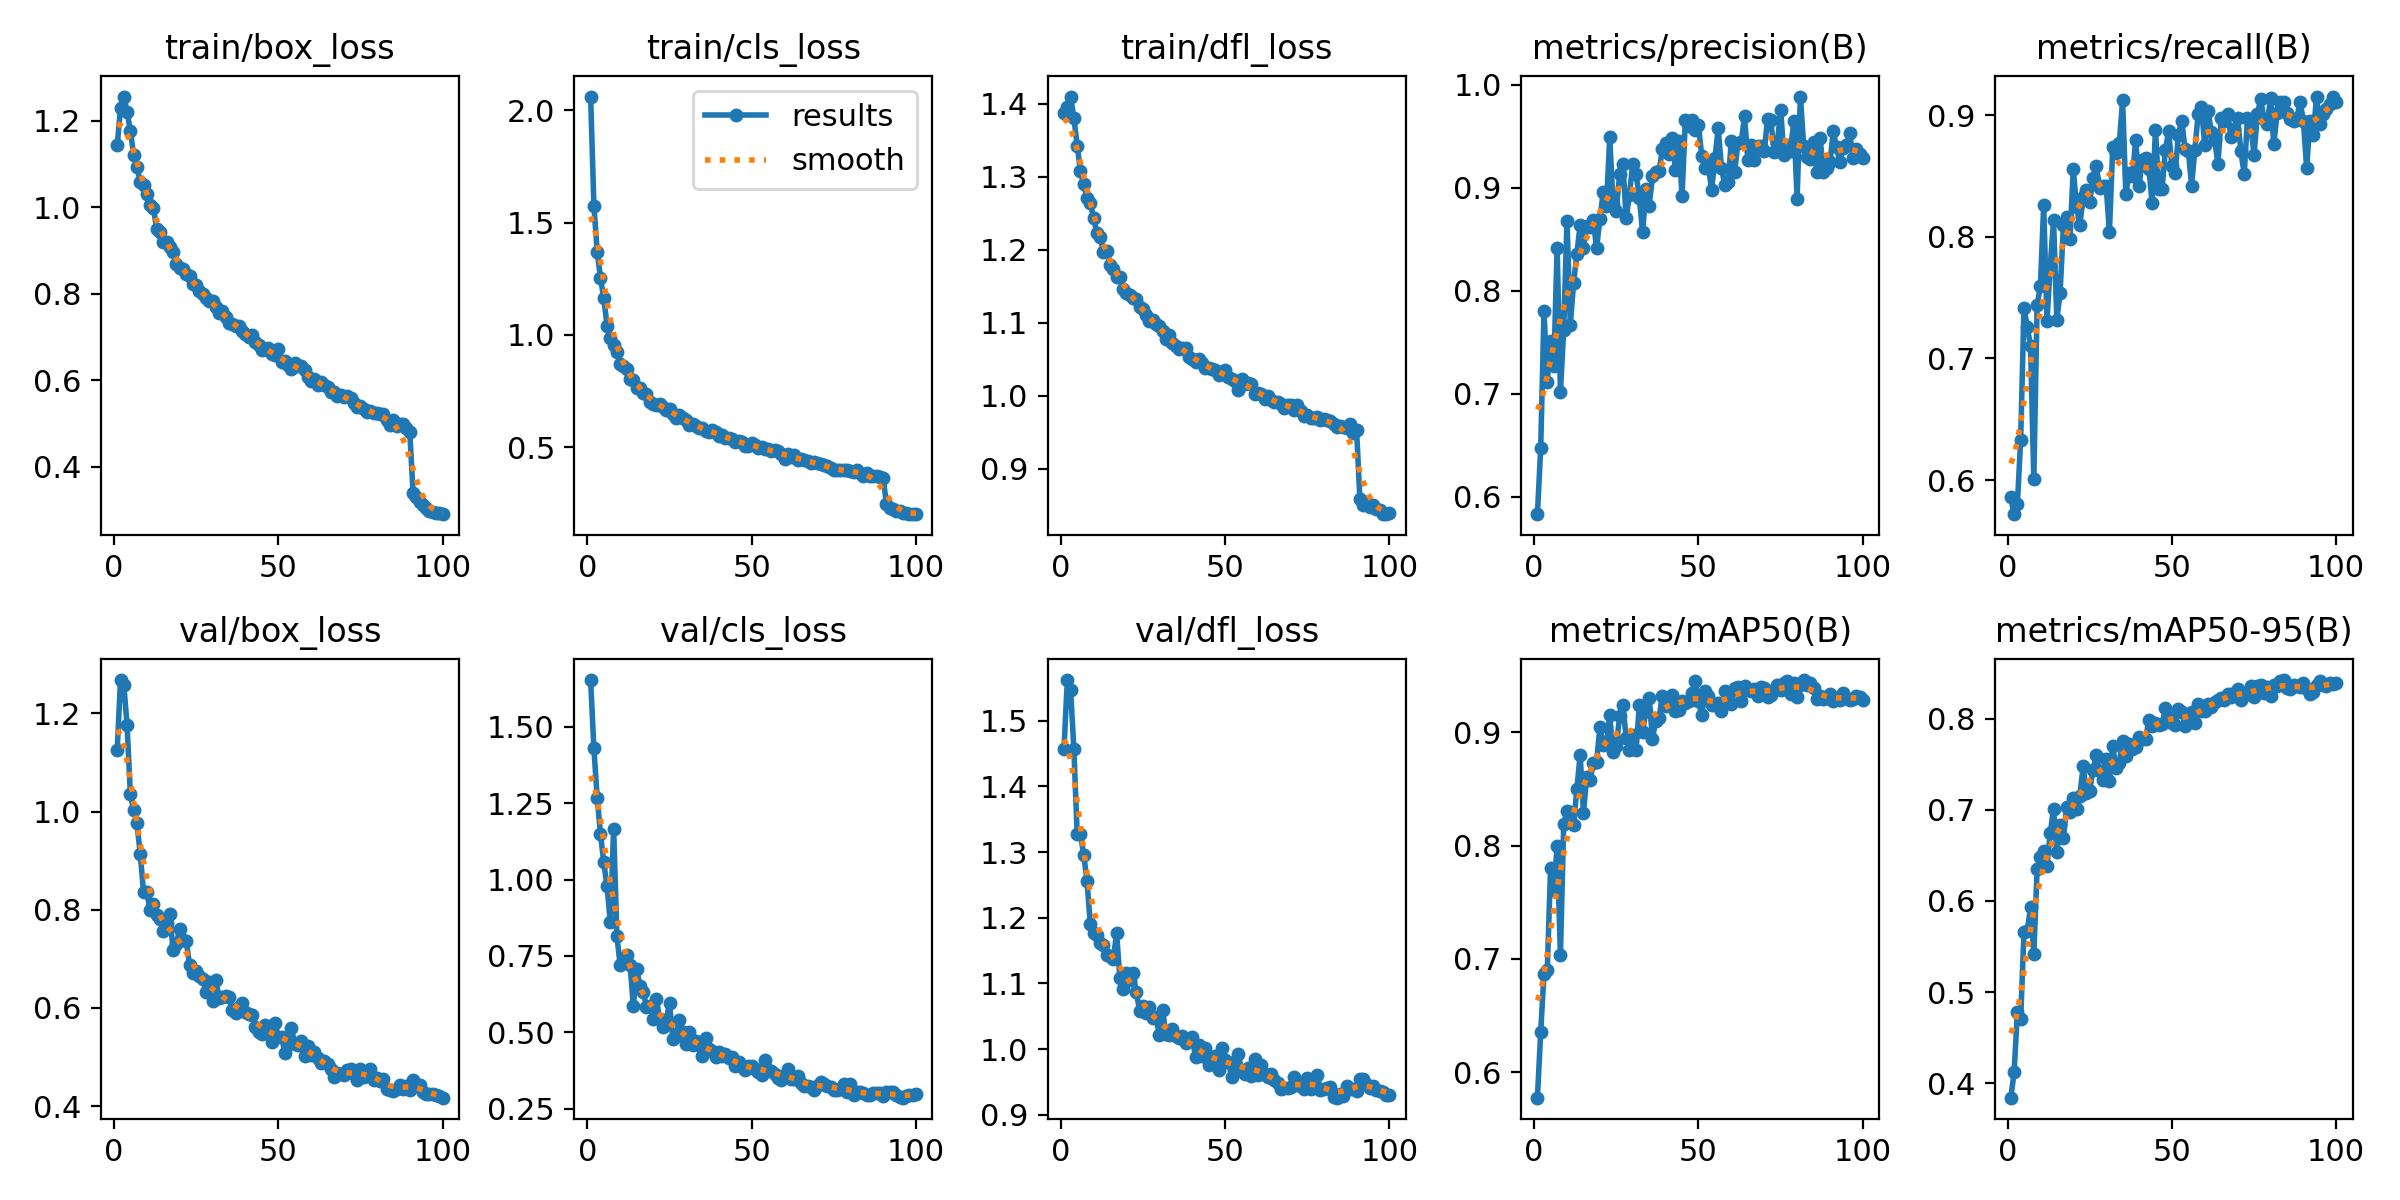

In [24]:
from IPython.display import Image
Image(filename= r'C:\Users\dounghun\Desktop\gochu_yolo\runs\detect\train\results.png',width=1000)

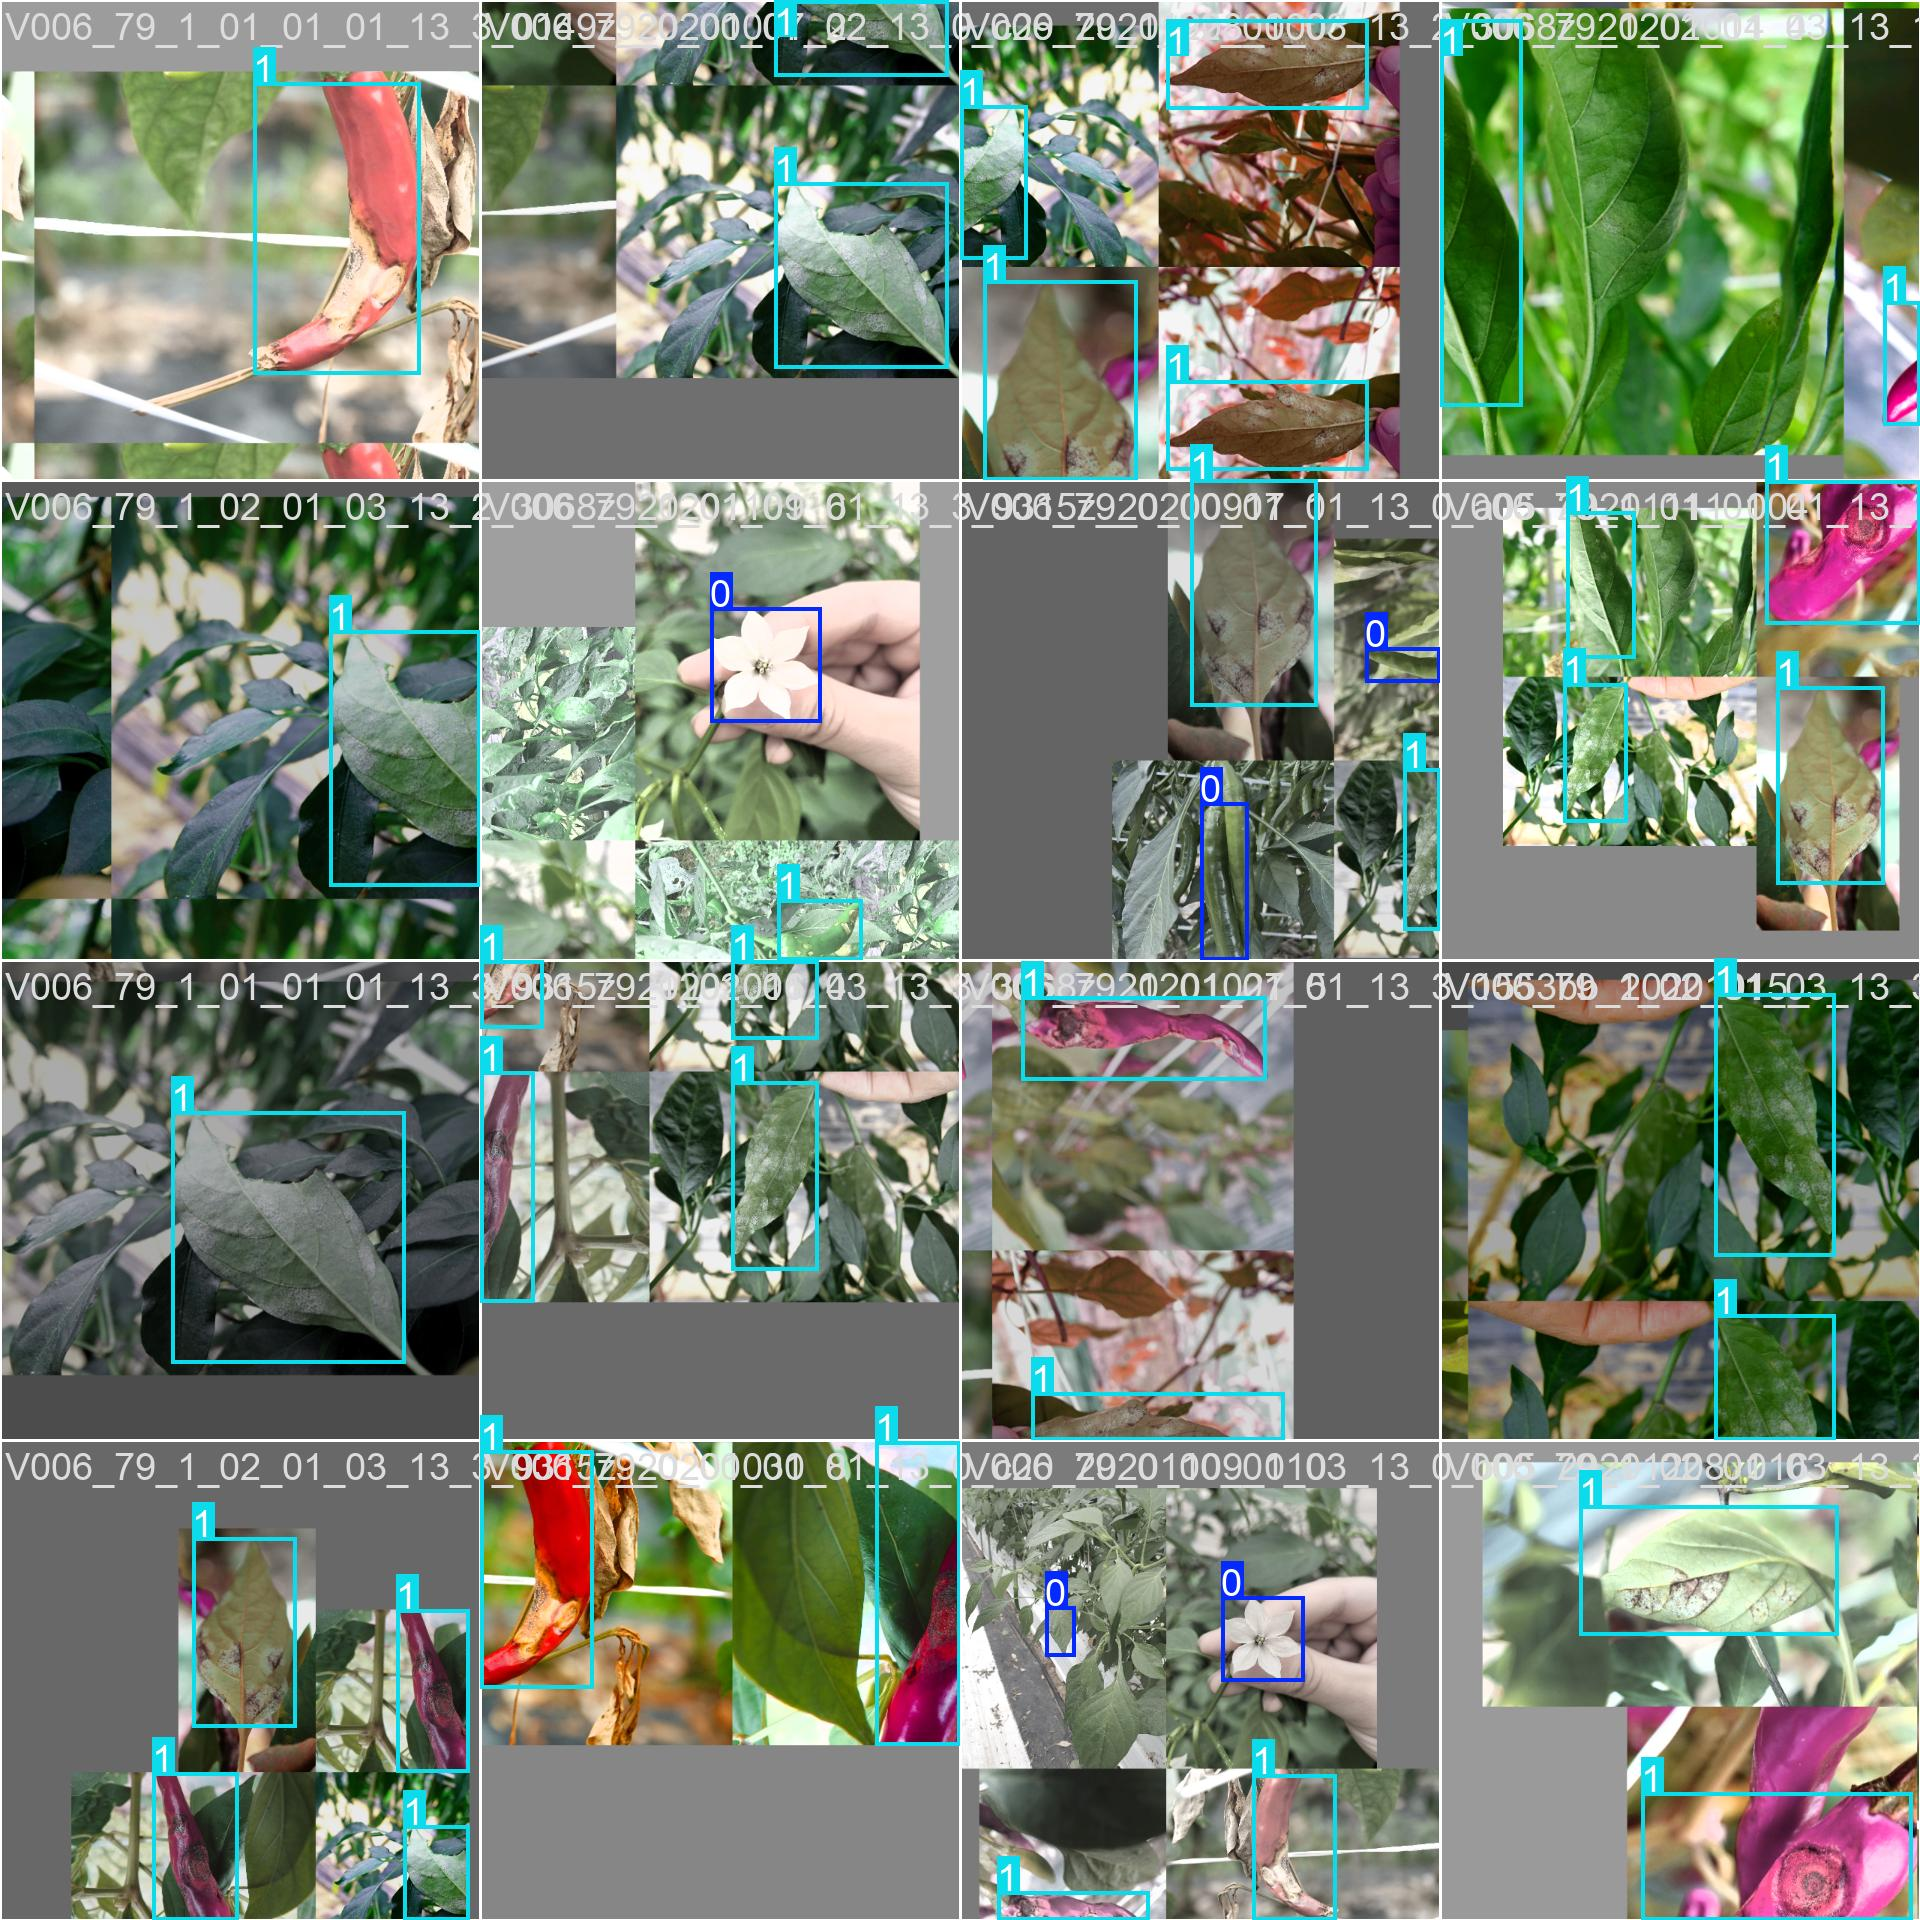

In [25]:
#훈련 데이터
Image(filename= r'C:\Users\dounghun\Desktop\gochu_yolo\runs\detect\train\train_batch2.jpg',width=1000)

In [38]:
# 학습된 모델 로드
model = YOLO(r"C:\Users\dounghun\Desktop\gochu_yolo\runs\detect\train\weights\best.pt")

# 이미지 예측
# results = model(r"C:\Users\dounghun\Desktop\gochu_yolo\test.JPG", save=True, conf=0.5)
results = model(r"C:\Users\dounghun\Desktop\gochu_yolo\tt.jpg", save=True, conf=0.5)


image 1/1 C:\Users\dounghun\Desktop\gochu_yolo\tt.jpg: 448x640 1 good, 51.1ms
Speed: 8.0ms preprocess, 51.1ms inference, 17.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict4


In [ ]:
# 동영상상 예측
model = YOLO(r"C:\Users\dounghun\Desktop\gochu_yolo\runs\detect\train\weights\best.pt")
results = model(r"C:\Users\dounghun\Desktop\gochu_yolo\test1.mp4", save=True, conf=0.5)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/697) C:\Users\dounghun\Desktop\gochu_yolo\test2.mp4: 640x384 (no detections), 27.1ms
video 1/1 (frame 2/697) C:\Users\dounghun\Desktop\gochu_yolo\test2.mp4: 640x384 (no detections), 19.1ms
video 1/1 (frame 3/697) C:\Users\dounghun\Desktop\gochu_yolo\test2.mp4: 640x384 (no detections), 18.2ms
video 1/1 (frame 4/697) C:\Users\dounghun\Desktop\gochu_yolo\test2.mp4: 640x384 (no detections), 12.7ms
video 1/1 (frame 5/697) C:\Users\dounghun\

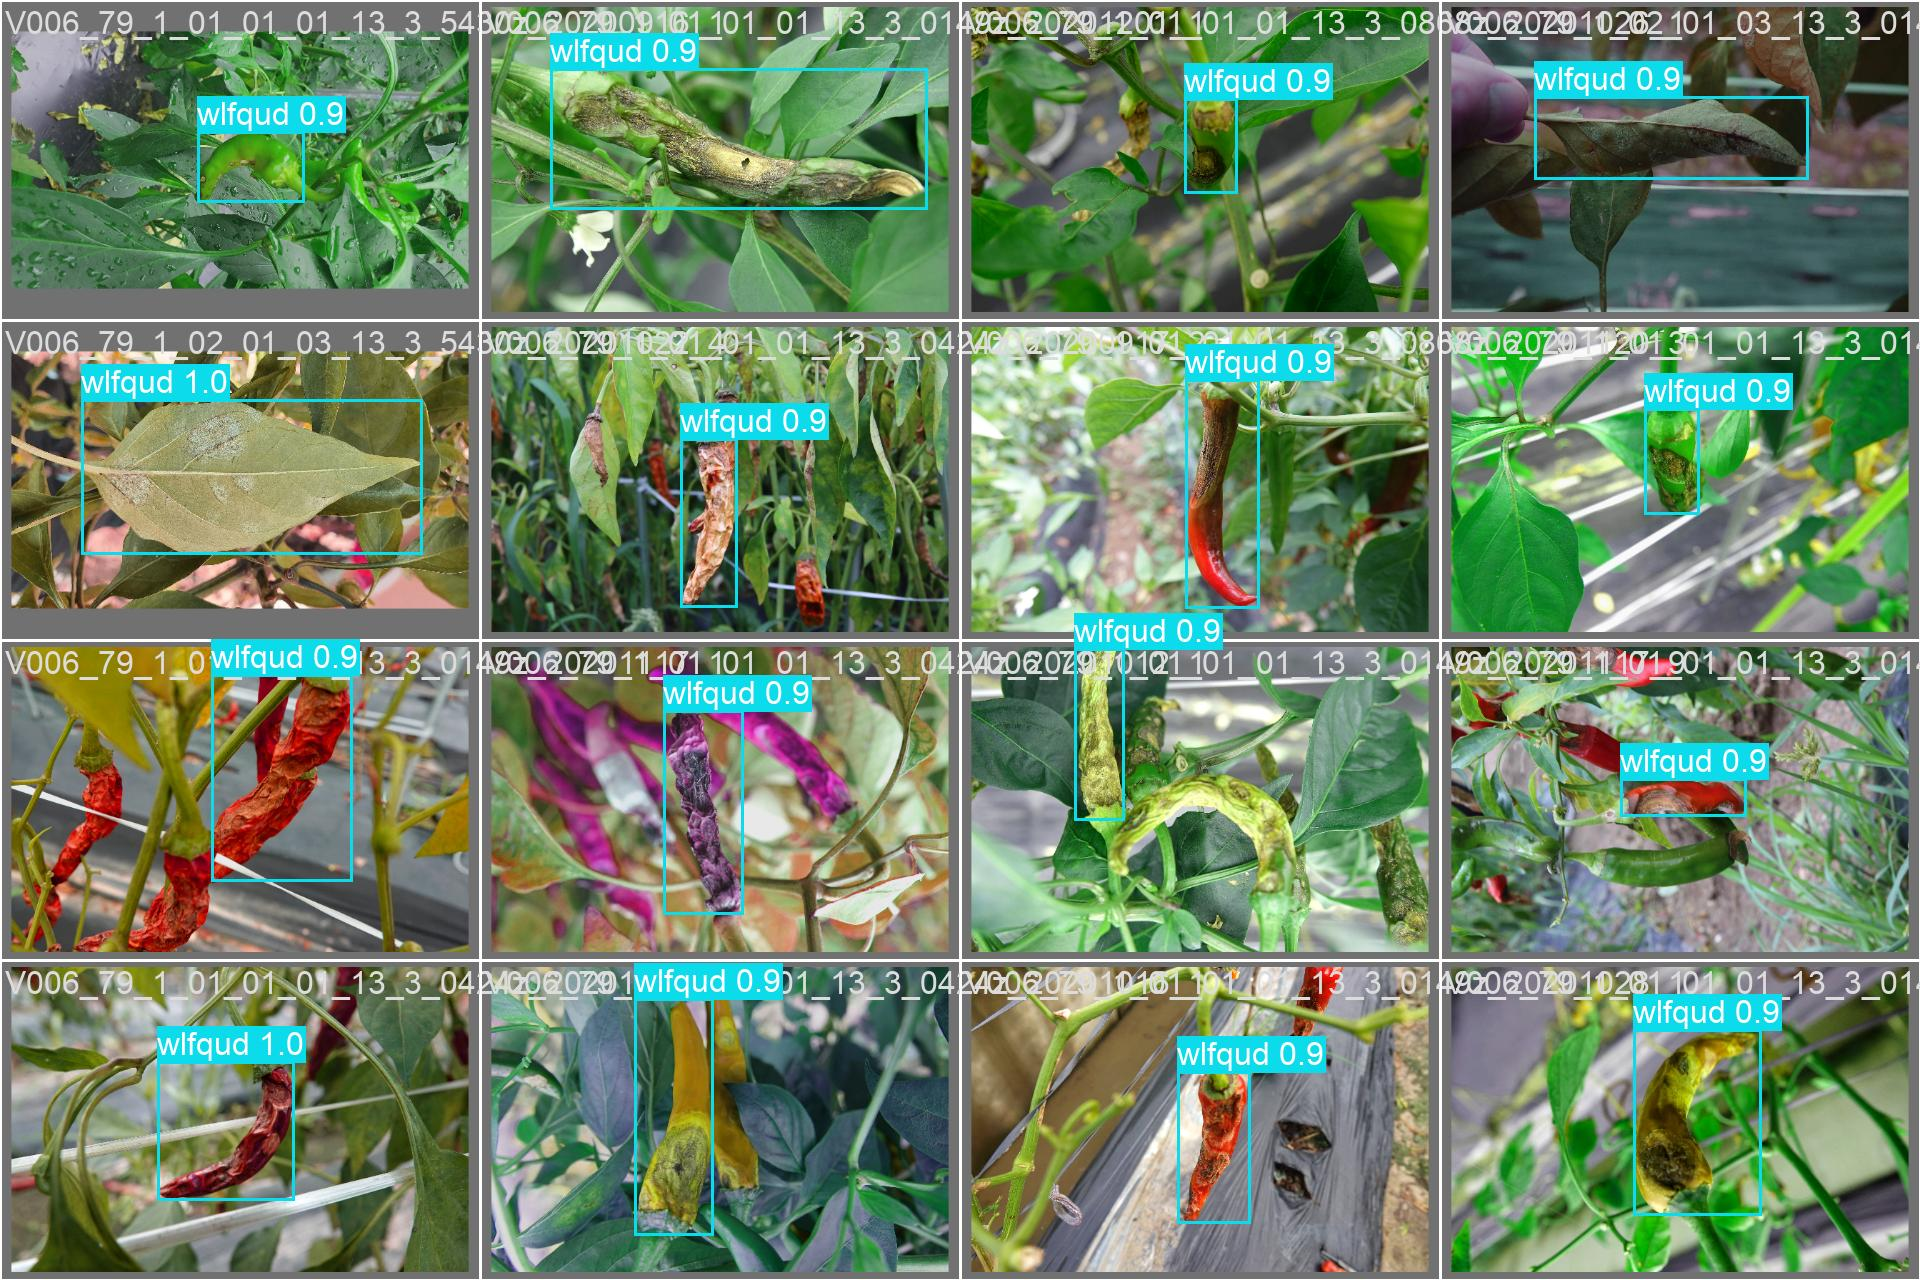

In [29]:
# 검증데이터
Image(filename= r'C:\Users\dounghun\Desktop\gochu_yolo\runs\detect\train\val_batch2_pred.jpg',width=1000)